## Principle Component Analysis (PCA)
- It is used for dimensionality reduction technique like 1. Feature Extraction (combining features remove irrelavent feature) 2. Feature Selection.
- PCA is dimensionality reduction technique.
- Let X be the data of n dimension X E R^n 
- We need to reduce it into X E R^k dimension where k<n.
- Defination:- It is process of transfering or projecting a space having many dimension into space of fewer dimension (features)
- Like converting 2D to 1D
- We use PCA when we don't require to explain reduced dimension dataset


**Application of PCA**
- Variance actually mean spread
- Data Compression
    - $X$ $\epsilon$ $R^{2}$ $[X_{1},X_{2}]$ $to$ $X$ $\epsilon$ $R$ $[X]$
- More Spread mean more informative feature 
- Variance  = Summation(X - Xmean)/n
- It speeds up the algorithm.

**PCA Objective**

**Step 1:. Data preprocessing | Standardisation (mean = 0 $&$ std = 1)**
- 2D $\rightarrow$ 1D, find a vector (direction $/$ axis) onto which to project the data so as to minimize the projection error.
- To convert from n Dimension to k dimension, find K vector $(U^{1}, U^{2}, U^{3}.. U^{k})$ where U denotes vector.
- Preprocessing (Standardization)

**Step2:. Compute Covariance Matrix**

- Variance(X) = summation from i = 1 to m $(X^{(i)} - X_{mean})^{2}$/N - 1

**Step3:. Compute 'eigen vectors'**

- $U^{k}$ eigen vector
- To compute eigen vector use singular value decomposition (SVD)
- U, S, V = SVD(covariance matrix)
    - This U will have shape of number of features i.e (n X n)
    - U to be reduced into shape of ( n X k).
- $U_{redu} = U[:, 0:k]$

**Step 4:. Projection**

- $U_{reduced} \rightarrow (n X k)$
- $Z^{i} = U_{redu}^{T}[k,n] * X^{i}[n,1]$
- $Z = X_{i}[m*n] * U_{redu}[n,k]$
- $Z_{final} = (m X k ) shape$ 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
df = pd.read_csv('mnist_train.csv')

In [3]:
df.shape

(42000, 785)

In [4]:
data = df.values
X = data[:, 1:]
Y = data[:, 0]
X.shape, Y.shape

((42000, 784), (42000,))

In [5]:
split = int(0.8*X.shape[0])
print(split)

X_train = X[:split,:]
Y_train = Y[:split]
X_test = X[split:,:]
Y_test = Y[split:]

print(X_train.shape),

print(Y_train.shape),

print(X_test.shape),

print(Y_test.shape)

33600
(33600, 784)
(33600,)
(8400, 784)
(8400,)


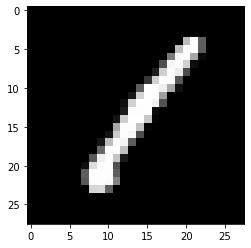

In [6]:
# Visualize Some Sample

def drawImg(sample):
    img = sample.reshape((28,28)) # 784(1d) = 28*28(2d)
    plt.imshow(img,cmap = 'gray')
    plt.show()
    
drawImg(X_train[0])


### Sklearn PCA

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components = 2) # n_components = 2 mean current data set is 2d i.e (n X n)

In [9]:
pca

PCA(n_components=2)

In [10]:
z_pca = pca.fit_transform(X_train)

In [11]:
z_pca.shape

(33600, 2)

In [12]:
z_pca

array([[-668.12385581, -698.49230281],
       [1697.49293402, -372.28059579],
       [-891.42946746, -291.15576083],
       ...,
       [1648.95057653, -210.03227353],
       [-404.29025824, -716.01822097],
       [ 331.46063295, -364.82370879]])

In [13]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [14]:
pca.explained_variance_ # wrong answer

array([331219.37331115, 246545.90932005])

### Custom PCA

In [15]:
covar = np.dot(X_train.T, X_train)

In [16]:
covar.shape

(784, 784)

In [17]:
covar

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [18]:
# Step 3 - Compute Eigen vector using SVD
from numpy.linalg import svd

In [19]:
U, S, V = svd(covar)

In [20]:
U.shape

(784, 784)

In [21]:
Ured = U[:, :2]
Ured.shape

(784, 2)

In [22]:
# Step 4 - Project of Data on New Axis(Components)

In [23]:
Z = np.dot(X_train, Ured)

In [24]:
Z.shape

(33600, 2)

In [25]:
Z

array([[ -939.68480951,   500.50391534],
       [-2217.89580916, -1593.10007598],
       [ -928.45522541,   673.67294848],
       ...,
       [-2196.13153045, -1416.95586243],
       [-1206.83141521,   316.8843444 ],
       [-1417.30984932,  -372.15375137]])

## Visualize Dataset

In [32]:
new_dataset = np.hstack((Z,Y_train.reshape(-1,1)))

In [34]:
dataframe = pd.DataFrame(new_dataset, columns = ['pc1','pc2','label'])

In [35]:
dataframe.head()

,pc1,pc2,label
0,-939.684810,500.503915,1.0
1,-2217.895809,-1593.100076,0.0
2,-928.455225,673.672948,1.0
3,-707.465577,-275.999461,4.0
4,-2325.780724,-1805.024642,0.0


<Figure size 1080x1080 with 0 Axes>

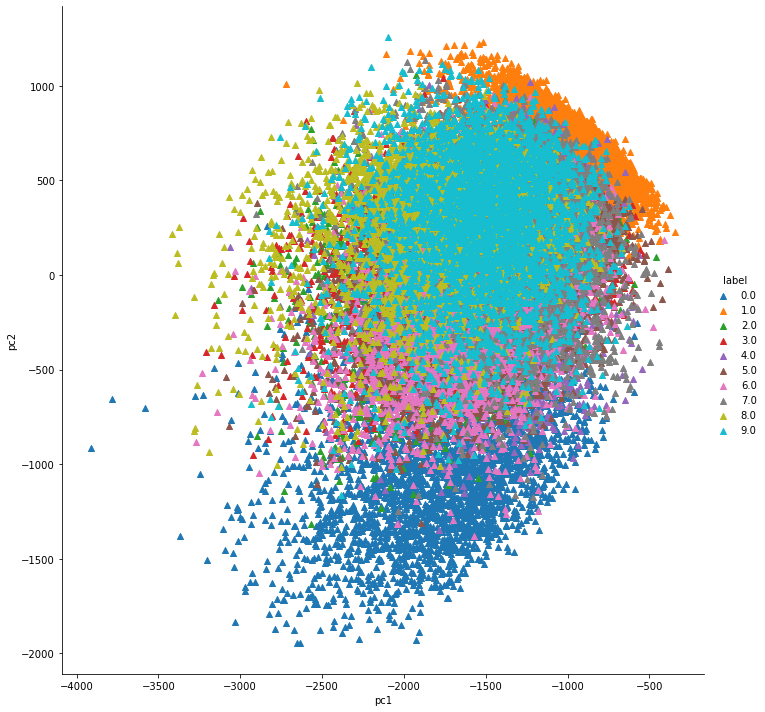

In [46]:
import seaborn as sns
plt.figure(figsize = (15,15))
fg = sns.FacetGrid(dataframe, hue = 'label', height =10)
fg.map(plt.scatter, 'pc1','pc2', marker='^')
fg.add_legend()
plt.show()

In [47]:
pca = PCA()

z_pca = pca.fit_transform(X_train)

In [48]:
z_pca.shape

(33600, 784)

In [51]:
pca.explained_variance_

array([3.31219373e+05, 2.46545910e+05, 2.11816315e+05, 1.85451466e+05,
       1.66700407e+05, 1.47259997e+05, 1.13027524e+05, 9.94943518e+04,
       9.49690994e+04, 8.05378071e+04, 7.23443294e+04, 7.05081341e+04,
       5.87048678e+04, 5.80092701e+04, 5.45142681e+04, 5.10173439e+04,
       4.54029288e+04, 4.42745663e+04, 4.08790696e+04, 3.97033347e+04,
       3.67259996e+04, 3.47243663e+04, 3.31425669e+04, 3.13979110e+04,
       3.04217422e+04, 2.87459235e+04, 2.78718769e+04, 2.68319046e+04,
       2.55881107e+04, 2.36759671e+04, 2.26208139e+04, 2.20649521e+04,
       2.06958743e+04, 2.03433682e+04, 1.93080406e+04, 1.86037326e+04,
       1.74518407e+04, 1.67362477e+04, 1.63721969e+04, 1.59877113e+04,
       1.56525501e+04, 1.52465402e+04, 1.43676892e+04, 1.37087928e+04,
       1.32185770e+04, 1.29555252e+04, 1.23830831e+04, 1.20119815e+04,
       1.15289517e+04, 1.10392283e+04, 1.08507948e+04, 1.06302957e+04,
       1.00616004e+04, 9.87191585e+03, 9.62735224e+03, 9.28314973e+03,
      

In [52]:
pca.explained_variance_ratio_

array([9.64765384e-02, 7.18131180e-02, 6.16971909e-02, 5.40177205e-02,
       4.85559707e-02, 4.28934291e-02, 3.29223021e-02, 2.89804022e-02,
       2.76623009e-02, 2.34587994e-02, 2.10722290e-02, 2.05373878e-02,
       1.70993695e-02, 1.68967579e-02, 1.58787447e-02, 1.48601717e-02,
       1.32248224e-02, 1.28961566e-02, 1.19071270e-02, 1.15646626e-02,
       1.06974338e-02, 1.01144043e-02, 9.65366276e-03, 9.14548488e-03,
       8.86114949e-03, 8.37302229e-03, 8.11843272e-03, 7.81551288e-03,
       7.45322450e-03, 6.89626133e-03, 6.58891959e-03, 6.42700993e-03,
       6.02822924e-03, 5.92555238e-03, 5.62398541e-03, 5.41883679e-03,
       5.08331732e-03, 4.87488165e-03, 4.76884208e-03, 4.65685031e-03,
       4.55922561e-03, 4.44096433e-03, 4.18497536e-03, 3.99305410e-03,
       3.85026557e-03, 3.77364469e-03, 3.60690553e-03, 3.49881224e-03,
       3.35811684e-03, 3.21547174e-03, 3.16058541e-03, 3.09635913e-03,
       2.93071136e-03, 2.87546063e-03, 2.80422491e-03, 2.70396669e-03,
      

In [54]:
cum_var_explained = np.cumsum(pca.explained_variance_ratio_)

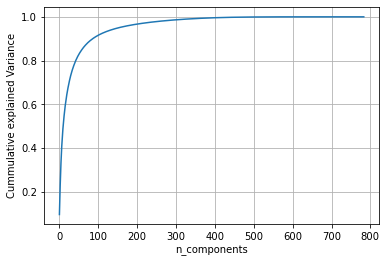

In [55]:
plt.plot(cum_var_explained)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cummulative explained Variance')
plt.show()